In [1]:
import matplotlib.pyplot as plt  
import numpy as np
import os             
import shutil                    
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

C:\Users\SAI AKASH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Rim-One

In [2]:
import os

# Define the directory for your dataset
rimOne_dir = "C:/Users/SAI AKASH/OneDrive/Desktop/RIM-ONE_DL_images/partitioned_randomly"

# Define the paths to the directories
train_glaucoma_dir = os.path.join(rimOne_dir, "training_set", "glaucoma")
train_normal_dir = os.path.join(rimOne_dir, "training_set", "normal")
test_glaucoma_dir = os.path.join(rimOne_dir, "test_set", "glaucoma")
test_normal_dir = os.path.join(rimOne_dir, "test_set", "normal")

# Ensure directories exist before listing files
if all(os.path.isdir(d) for d in [train_glaucoma_dir, train_normal_dir, test_glaucoma_dir, test_normal_dir]):
    # List the images in each directory
    rimOne_glaucoma_images = os.listdir(train_glaucoma_dir) + os.listdir(test_glaucoma_dir)
    rimOne_normal_images = os.listdir(train_normal_dir) + os.listdir(test_normal_dir)

    # Look at the number of samples in each dataset
    print("Rim One dataset contains:")
    print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
    print(f"\t{len(rimOne_normal_images)} images representing a normal eye")
else:
    print("One or more directories do not exist. Please verify the paths.")


Rim One dataset contains:
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


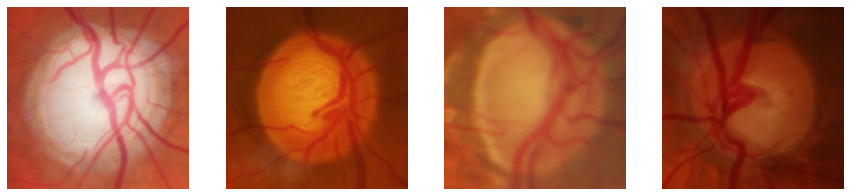


Sample Rim-One normal images:


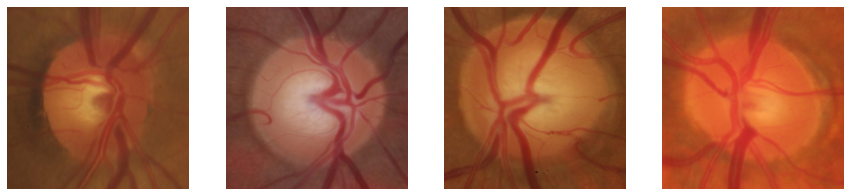

In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

# Display sample Rim-One glaucoma images
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    img_path = os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])
    plt.imshow(load_img(img_path))
    plt.axis('off')  # Hide axes
plt.show()

# Display sample Rim-One normal images
print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    img_path = os.path.join(train_normal_dir, rimOne_normal_images[i - 1])
    plt.imshow(load_img(img_path))
    plt.axis('off')  # Hide axes
plt.show()

In [4]:
import os

# Define the base directory for your Acrima dataset
acrima_dir = r'C:\Users\SAI AKASH\OneDrive\Desktop\acrima'

train_glaucoma_dir = os.path.join(acrima_dir, "train", "Glaucoma")
train_normal_dir = os.path.join(acrima_dir, "train", "Non Glaucoma")
test_glaucoma_dir = os.path.join(acrima_dir, "test", "Glaucoma")
test_normal_dir = os.path.join(acrima_dir, "test", "Non Glaucoma")


if all(os.path.isdir(d) for d in [train_glaucoma_dir, train_normal_dir, test_glaucoma_dir, test_normal_dir]):
    # List the images in each directory
    acrima_glaucoma_images = os.listdir(train_glaucoma_dir) + os.listdir(test_glaucoma_dir)
    acrima_normal_images = os.listdir(train_normal_dir) + os.listdir(test_normal_dir)

    # Look at the number of samples in each dataset
    print("Acrima dataset contains:")
    print(f"\t{len(acrima_glaucoma_images)} images representing an eye with glaucoma")
    print(f"\t{len(acrima_normal_images)} images representing a normal eye")
else:
    print("One or more directories do not exist. Please verify the paths.")


Acrima dataset contains:
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


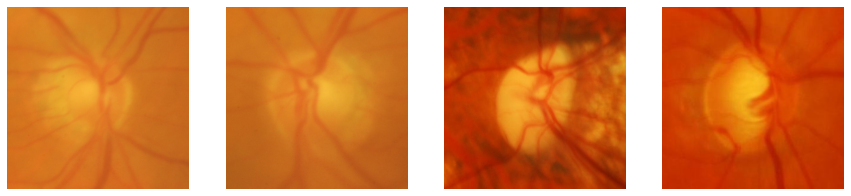


Sample normal images:


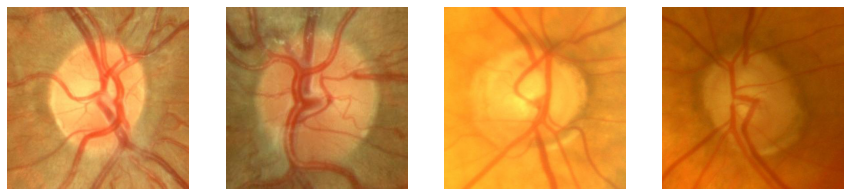

In [5]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

# Display sample glaucoma images
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    img_path = os.path.join(train_glaucoma_dir, acrima_glaucoma_images[i - 1])
    plt.imshow(load_img(img_path))
    plt.axis('off')  # Hide axes
plt.show()

# Display sample normal images
print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    img_path = os.path.join(train_normal_dir, acrima_normal_images[i - 1])
    plt.imshow(load_img(img_path))
    plt.axis('off')  # Hide axes
plt.show()

In [6]:
import os
import shutil

# Create the combine directory if it doesn't exist
os.makedirs("C:/Users/SAI AKASH/OneDrive/Desktop/combine", exist_ok=True)

# Define the paths for glaucoma images
g_path1 = os.path.join(acrima_dir, "train", "Glaucoma")
g_path4 = os.path.join(acrima_dir, "test", "Glaucoma")
g_path2 = os.path.join(rimOne_dir, "training_set", "glaucoma")
g_path3 = os.path.join(rimOne_dir, "test_set", "glaucoma")
g_dest = "C:/Users/SAI AKASH/OneDrive/Desktop/combine/glaucoma"

# Create the destination directory for glaucoma images if it doesn't exist
os.makedirs(g_dest, exist_ok=True)

g_list = [g_path1, g_path2, g_path3,g_path4]

# Copy images to the destination directory
for i in g_list:
    if os.path.isdir(i):  # Ensure the source directory exists
        shutil.copytree(i, g_dest, dirs_exist_ok=True)
    else:
        print(f"Directory {i} does not exist.")
        
print(f"Number of glaucoma images: {len(os.listdir(g_dest))}")

##################################################
# For normal images
n_path1 = os.path.join(acrima_dir, "train", "Non Glaucoma")
n_path4 = os.path.join(acrima_dir, "test", "Non Glaucoma")
n_path2 = os.path.join(rimOne_dir, "training_set", "normal")
n_path3 = os.path.join(rimOne_dir, "test_set", "normal")

n_dest = "C:/Users/SAI AKASH/OneDrive/Desktop/combine/normal"

# Create the destination directory for normal images if it doesn't exist
os.makedirs(n_dest, exist_ok=True)

n_list = [n_path1, n_path2, n_path3,n_path4]

# Copy images to the destination directory
for i in n_list:
    if os.path.isdir(i):  # Ensure the source directory exists
        shutil.copytree(i, n_dest, dirs_exist_ok=True)
    else:
        print(f"Directory {i} does not exist.")

print(f"Number of normal images: {len(os.listdir(n_dest))}")


Number of glaucoma images: 568
Number of normal images: 622


Total images: 1190
Total number of classes: 2
Total glaucoma images: 568
Total normal images: 622


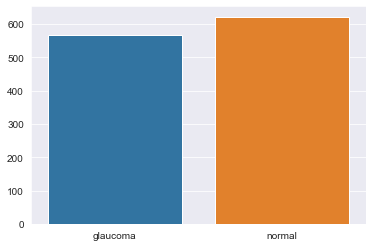

In [7]:
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the base directory for the images
base_dir = "C:/Users/SAI AKASH/OneDrive/Desktop/combine"
base_dir = pathlib.Path(base_dir)

# Get the list of files in the glaucoma and normal directories
glaucoma = [fn for fn in os.listdir('C:/Users/SAI AKASH/OneDrive/Desktop/combine/glaucoma')]
normal = [fn for fn in os.listdir("C:/Users/SAI AKASH/OneDrive/Desktop/combine/normal")]

# Prepare data and dataset classes
data = [glaucoma, normal]
dataset_classes = ['glaucoma', 'normal']

# Count the total number of images
image_count = len(list(base_dir.glob('*/*.jpg'))) + len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')

# Count images per class
count = 0
data_count = []
for x in dataset_classes:
    print(f'Total {x} images: {len(data[count])}')
    data_count.append(len(data[count]))
    count += 1

# Plotting the class distribution
sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()


In [8]:
!pip install split-folders 
# First, ensure you have the split-folders library installed
# You can install it using pip if you haven't already
# !pip install split-folders

import splitfolders  # To split dataset
import pathlib

# Define the base directory where the combined images are stored
base_ds = 'C:/Users/SAI AKASH/OneDrive/Desktop/combine'  # Update this path as needed
base_ds = pathlib.Path(base_ds)

# Define the output directory for the split datasets
output_dir = base_ds.parent / 'split_images'  # This will create a 'split_images' folder in the parent directory

# Set the image dimensions and batch size (if needed for later use)
img_height = 256
img_width = 256
batch_size = 32

# Split the dataset into train, test, and validation sets
splitfolders.ratio(base_ds, output=str(output_dir), seed=1321, ratio=(.8, .1, .1), group_prefix=None)

print(f'Dataset split completed. Check the "{output_dir}" directory for the split datasets.')

Copying files: 1190 files [00:38, 31.09 files/s]

Dataset split completed. Check the "C:\Users\SAI AKASH\OneDrive\Desktop\split_images" directory for the split datasets.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

# Define image dimensions and batch size
img_height = 256
img_width = 256
batch_size = 32

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

# Define the base directory where the split datasets are stored
base_dir = pathlib.Path(r'C:/Users/SAI AKASH/OneDrive/Desktop/split_images')  # Ensure this is a Path object

# Create training data generator
train_ds = datagen.flow_from_directory(
    str(base_dir / 'train'),  # Path to training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Shuffle is typically set to True for training
)

# Create validation data generator
val_ds = datagen.flow_from_directory(
    str(base_dir / 'val'),  # Path to validation data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Shuffle is typically set to False for validation
)

# Create test data generator
test_ds = datagen.flow_from_directory(
    str(base_dir / 'test'),  # Path to test data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Shuffle is typically set to False for testing
)

# Print the class indices to verify the classes
print("Class indices:", train_ds.class_indices)

Found 1230 images belonging to 2 classes.
Found 279 images belonging to 2 classes.
Found 286 images belonging to 2 classes.
Class indices: {'glaucoma': 0, 'normal': 1}


In [10]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the base model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a batch normalization layer
x = BatchNormalization()(x)

# Add a dense layer
x = Dense(512, activation='relu')(x)

# Add a dropout layer
x = Dropout(0.25)(x)

# Add the output layer
predictions = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate schedule
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [11]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 262, 262, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 64, 64, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 64, 64, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 64, 64, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 19,314,242 (73.68 MB)

 Trainable params: 988,418 (3.77 MB)

 Non-trainable params: 18,325,824 (69.91 MB)

In [12]:

# Define the batch size, number of training samples, number of validation samples, and number of epochs
batch_size = 32
num_train_samples = 1032  # Total number of training samples
num_val_samples = 128      # Total number of validation samples
num_epochs = 30           # Number of epochs to train

# Fit the model
model_info = model.fit(
    train_ds,
    steps_per_epoch=int(round(num_train_samples / batch_size)),  # Total training samples / batch size
    epochs=num_epochs,                                           # Number of epochs to train
    validation_data=val_ds,
    validation_steps=int(round(num_val_samples / batch_size))   # Total validation samples / batch size
)

C:\Users\SAI AKASH\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 519s 12s/step - accuracy: 0.6659 - loss: 0.6049 - val_accuracy: 0.4609 - val_loss: 0.7788
Epoch 2/30
 7/32 ━━━━━━━━━━━━━━━━━━━━ 2:51 7s/step - accuracy: 0.8713 - loss: 0.3267

C:\Users\SAI AKASH\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8777 - loss: 0.3125 - val_accuracy: 0.9688 - val_loss: 0.2732
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 282s 9s/step - accuracy: 0.8579 - loss: 0.3290 - val_accuracy: 0.9130 - val_loss: 0.2796
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.8796 - loss: 0.2807 - val_accuracy: 0.7266 - val_loss: 0.5634
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 296s 9s/step - accuracy: 0.8900 - loss: 0.2655 - val_accuracy: 0.9609 - val_loss: 0.2379
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9263 - loss: 0.2338 - val_accuracy: 0.9130 - val_loss: 0.2736
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 314s 10s/step - accuracy: 0.9073 - loss: 0.2297 - val_accuracy: 0.8359 - val_loss: 0.4087
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9183 - loss: 0.2092 - val_accuracy: 0.9688 - val_loss: 0.2033
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 236s 7s/step - accuracy: 0.9196 - loss: 0.1946 - val_accuracy: 0.8261 - val_loss: 0.330

In [13]:
model.save('C:/Users/SAI AKASH/OneDrive/Desktop/densenet.keras')

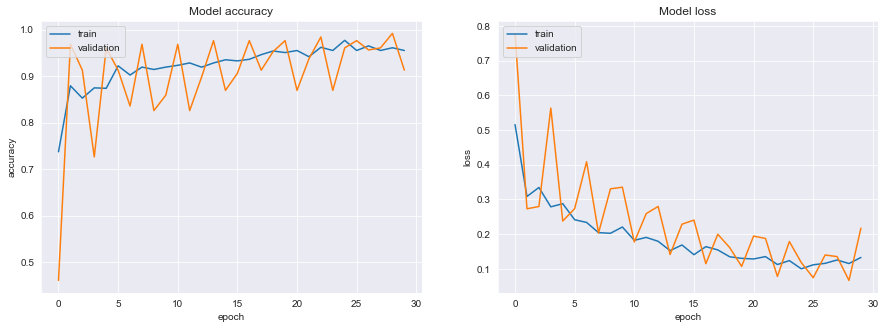

In [14]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

In [15]:
model = load_model('C:/Users/SAI AKASH/OneDrive/Desktop/densenet.keras')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


In [16]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  image = tf.keras.applications.densenet.preprocess_input(image)
  result = np.argmax(model.predict(image))
  return result

In [17]:
import gradio as gr
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the model
model = keras.models.load_model('C:/Users/SAI AKASH/OneDrive/Desktop/densenet.keras')

# Define a function to classify the image
def classify_image(img):
    # Resize the image to the expected input size (256x256)
    img = tf.image.resize(img, (256, 256))
    img = tf.cast(img, tf.float32) / 255.0  # Normalize to [0, 1] range
    
    # Expand dimensions to match model input shape
    img = tf.expand_dims(img, axis=0)
    
    # Debug: print input shape and first few values
    print(f"Input shape: {img.shape}")
    print(f"Input sample values: {img[0, 0, 0, :3]}")  # Check the first pixel's RGB values
    
    # Make predictions
    predictions = model.predict(img)
    
    # Debug: print raw prediction values
    print(f"Raw predictions: {predictions}")
    
    predictions = tf.nn.softmax(predictions)
    class_idx = tf.argmax(predictions, axis=1).numpy()[0]
    
    # Debug: print interpreted prediction
    print(f"Predicted class index: {class_idx}")
    
    if class_idx == 0:
        return "Glaucoma detected"
    else:
        return "No glaucoma detected"

# Create a Gradio interface
demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Textbox(label="Glaucoma diagnosis"),
    title="Glaucoma Detection Model",
    description="Upload an image of an eye to detect glaucoma"
)

# Launch the Gradio interface
demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [18]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

C:\Users\SAI AKASH\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9695 - loss: 0.1001
Loss: 0.11006055772304535 Accuracy: 0.9685314893722534


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

In [20]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step
[[111   2]
 [  8 165]]


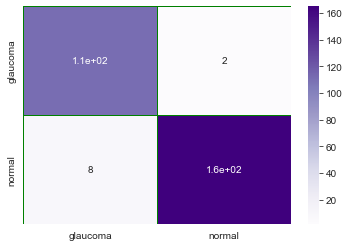

Input shape: (1, 256, 256, 3)
Input sample values: [0.54509807 0.09019608 0.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Raw predictions: [[0.99364775 0.00635225]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.54509807 0.09019608 0.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Raw predictions: [[0.99364775 0.00635225]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.7582414 0.1633272 0.       ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Raw predictions: [[9.9960953e-01 3.9053537e-04]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.5537071  0.11841299 0.01176471]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Raw predictions: [[0.99866986 0.00133015]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.31605104 0.13154393 0.0421875 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Raw predictions: [[0.00857803 0.991422  ]]
Predicted class index: 1


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 406, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\starlette\middleware\errors.py", line 187, in __call__
    raise exc
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\starlette\middleware\errors.py", line 165, in __call__
    await self.app(scope, receive, _send)
 

Input shape: (1, 256, 256, 3)
Input sample values: [0.31605104 0.13154393 0.0421875 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Raw predictions: [[0.00857803 0.991422  ]]
Predicted class index: 1
Input shape: (1, 256, 256, 3)
Input sample values: [0.31605104 0.13154393 0.0421875 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Raw predictions: [[0.00857803 0.991422  ]]
Predicted class index: 1
Input shape: (1, 256, 256, 3)
Input sample values: [0.84705883 0.41568628 0.11372549]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Raw predictions: [[0.969873   0.03012696]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.21615776 0.05812315 0.02634466]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Raw predictions: [[0.022243  0.9777569]]
Predicted class index: 1
Input shape: (1, 256, 256, 3)
Input sample values: [0.21615776 0.05812315 0.02634466]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
Raw predictions: [[0.022243  0.9777569]]
Predicted class index: 1
Input shape: (1, 256, 256, 3)
Input sam

Traceback (most recent call last):
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\gradio\blocks.py", line 1935, in process_api
    result = await self.call_function(
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\gradio\blocks.py", line 1520, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\SAI AKASH\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  Fil

Input shape: (1, 256, 256, 3)
Input sample values: [0.5537071  0.11841299 0.01176471]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Raw predictions: [[0.99866986 0.00133015]]
Predicted class index: 0
Input shape: (1, 256, 256, 3)
Input sample values: [0.83137256 0.44705883 0.10588235]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Raw predictions: [[0.9107976  0.08920237]]
Predicted class index: 0


In [21]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()